### Problem Statement: * For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
os.chdir('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module7 - TimeSeries Forecasting\Project')
os.getcwd()

'D:\\Study\\Data Science and Machine Learning\\Great_learning course\\Main content\\Module7 - TimeSeries Forecasting\\Project'

## For Data Set 1 "Sparkling Wine" :

### Ques 1 : Read the data as an appropriate Time Series data and plot the data.

In [3]:
# Reading the data.

sparkling = pd.read_csv("Sparkling.csv", parse_dates=True, index_col=0)

In [4]:
# Checking the top 5 and last 5 rows of the data.

print(sparkling.head())
print(sparkling.tail())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


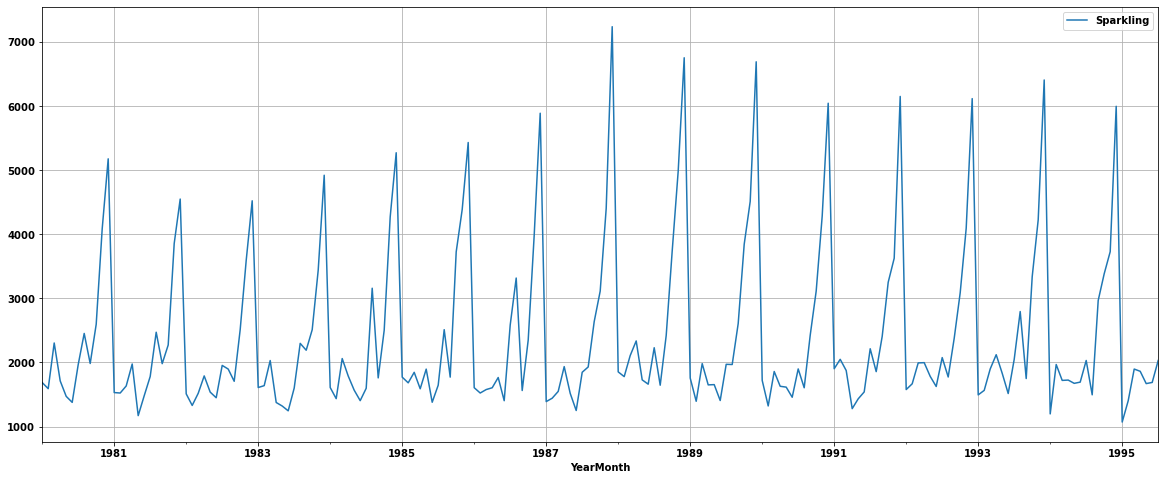

In [5]:
# Plotting the time series to understand the behaviour of the data.

sparkling.plot(figsize=(20,8))
plt.grid()

#### Inference: 

* The data seems to have only seasonality and no trend. 

### Ques 2 - Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [6]:
# Checking the basic measures by performing descriptive statistics.

round(sparkling.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


####  Inference:

* The dataset has 187 counts. 
* The highest sale value of sparkling wine is 7242 and the lowest is 1070.
* The mean sale value of sparkling wine is 2402.

In [7]:
print(sparkling.head())
print(sparkling.tail())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


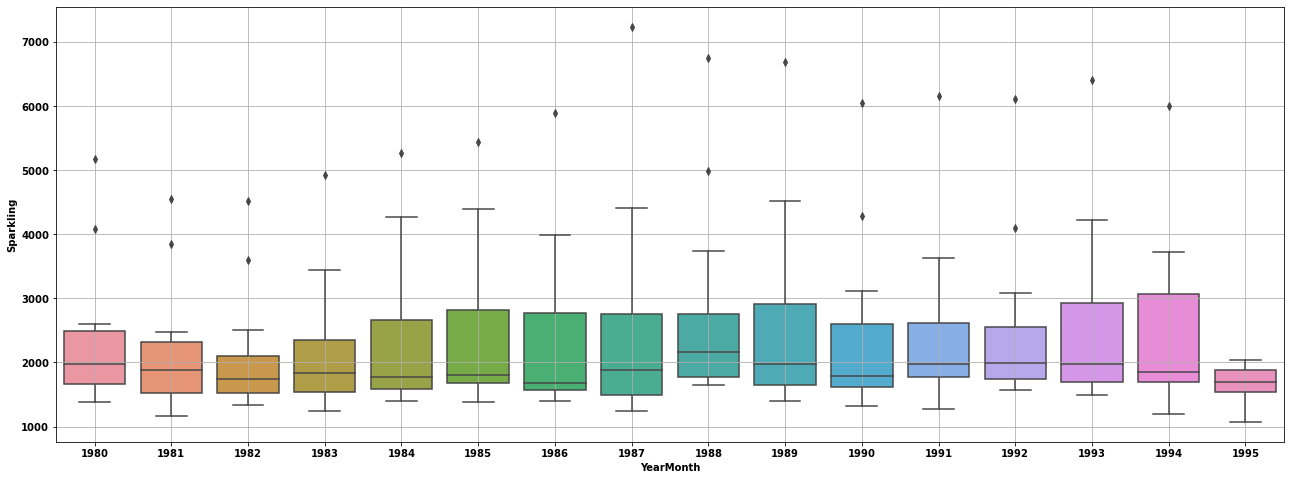

In [8]:
# Plotting the boxplot to understand the spread of sales across different years and within different months across years.

# Yearly BoxPlot of sparkling wine
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling'])
plt.grid();

#### Inference:

* It is evident from the yearly box plot of the sparkling wine sales data that in some part of the year, the sales of wine are too high in comparison to other parts of the year. 

* To study the monthly sales pattern of the wine, we'll analyse the monthly box plots.

* The yearly plot does not show any clear sales trend. 

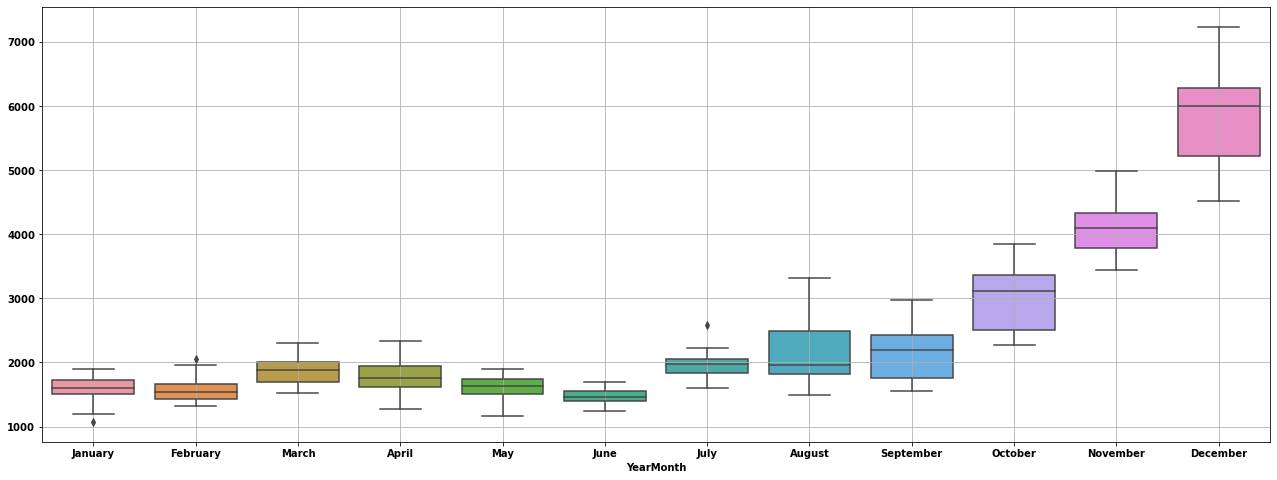

In [9]:
# Monthly Boxplot of sparkling wine.

_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkling.index.month_name(),y = sparkling.values[:,0],ax=ax)
plt.grid();

#### Inference:

* From the above box plots, it can be easily noticed that the monthly mean sales of the wine are gradually increasing from the month of July and the sales are highest in the month of December. 
* Whereas, the sales are nominal from January to June. However, there seems to have a little upsurge in the month of March and April but it came back to normal in the month of May and June. 
* The main rise in sales starts from the month of October. From the month of October the sales of sparkling wine rose greatly, and it kept rising till December then sudden downfall in sales in January.  
* So, we can say there is a monthly sales trend in the data. But no yearly trend.

In [10]:
# Plotting a pivot table of monthly sales of sparkling wines across years.

monthly_sales_across_years = pd.pivot_table(sparkling, values = 'Sparkling', columns = sparkling.index.month_name(), index = sparkling.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


#### Inference: 

* From the above table, we can easily conclude that the sales of wine are highest in the month of December for almost every year except 1995 because data is not available.

* And the highest sale of sparkling wine was 7242 units in the month of december in year 1987. 

* And the lowest sale of the sparkling wine was 1070 units in the month of January in year 1995. 

* Also the year 1995 also has missing values for some months. 

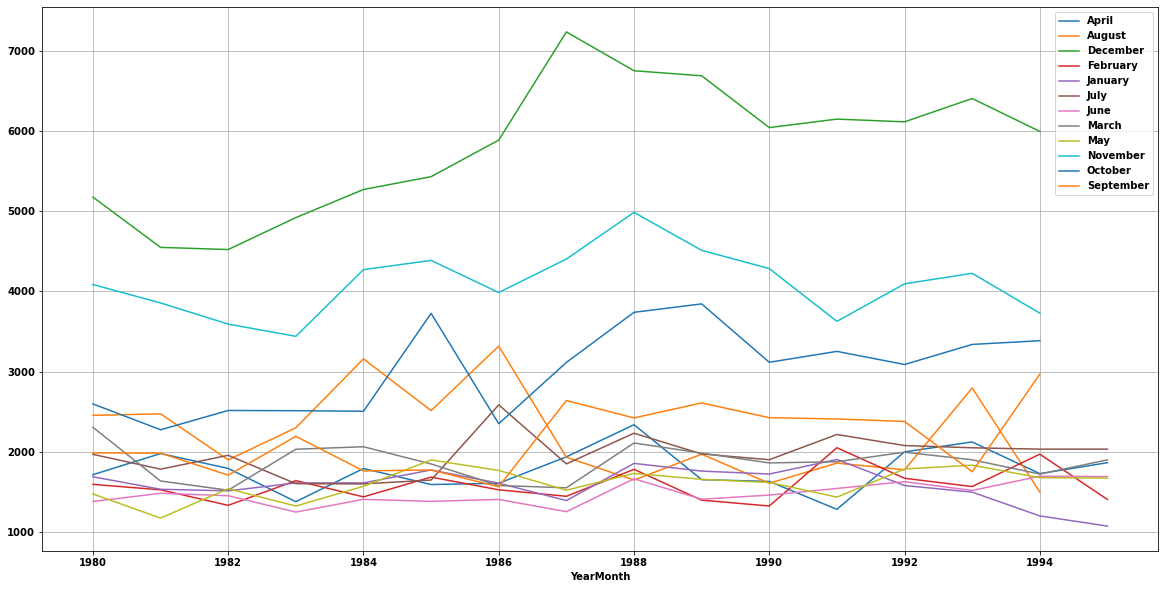

In [11]:
# Plotting a graph for checking the monthly sales of sparkling wine across years.

monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Inference:

* From the above plot, it can be easily noticed that the sales of wine is clearly much higher in the month of November and December across years.

In [12]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

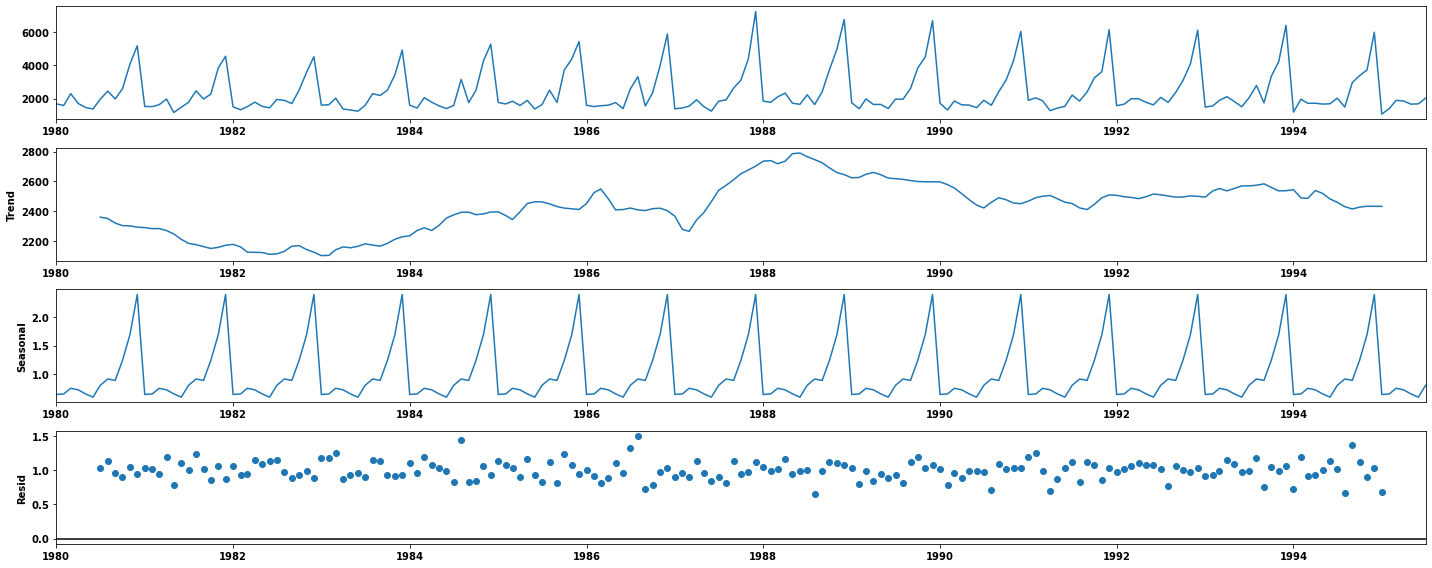

In [13]:
# Decomposing the time series:

from statsmodels.tsa.seasonal import  seasonal_decompose

decomposition = seasonal_decompose(sparkling,model='multiplicative')
decomposition.plot();

In [14]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

#### Inference: 

* The above decomposition of time series data shows that there is no clear yearly trend in the data, however there is some sort of seasonality present in the data and quite a lot residuals. 

### Ques 3: Split the data into training and test. The test data should start in 1991.

In [15]:
# Splitting the data into train and test.

train = sparkling.loc[:'1990-12-1']
test = sparkling.loc['1-1-1991':]

In [16]:
# Checking the shape of train and test data.

print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Inference: 

* There are 132 values in the train data and 55 values in the test data.

In [17]:
# Checking the 5 top and 5 bottom rows of train and test data.

print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



### Ques 4:   Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [18]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [19]:
# Making new regression variables by copying the train and test data. 

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [20]:
# Checking first and last five rows of the data.

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [21]:
# importing the model LinearRegression from the sklearn library.

from sklearn.linear_model import LinearRegression

In [22]:
# Assigning LinearRegression to a variable lr.

lr = LinearRegression()

In [23]:
# Fitting the LinearRegression model on train data set of sparkling wine.

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

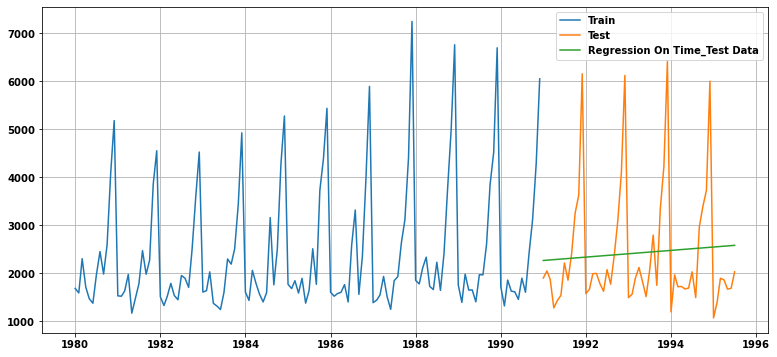

In [24]:
# Predicting and plotting the train and test data.

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [25]:
# Importing the metrics algorithm from sklearn library.

from sklearn import metrics

### Model Evaluation

In [26]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [27]:
# Making dataframe 'resultsDf' to showcase RMSE value of every model's test data.  

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [28]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [29]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

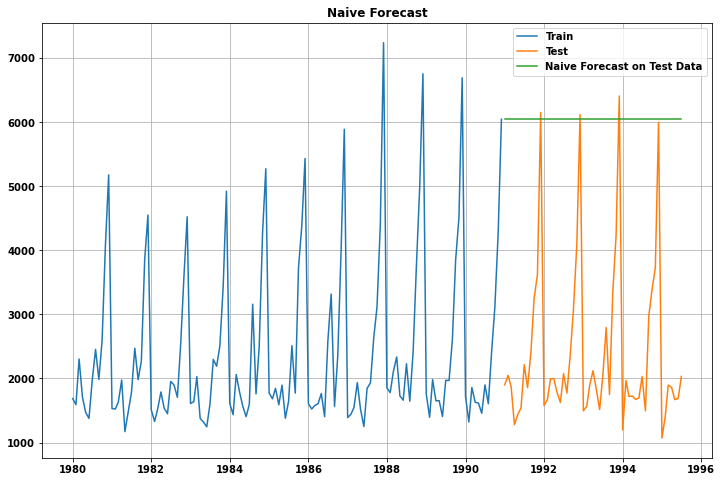

In [30]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [31]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [32]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352


## Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [33]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()


In [34]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


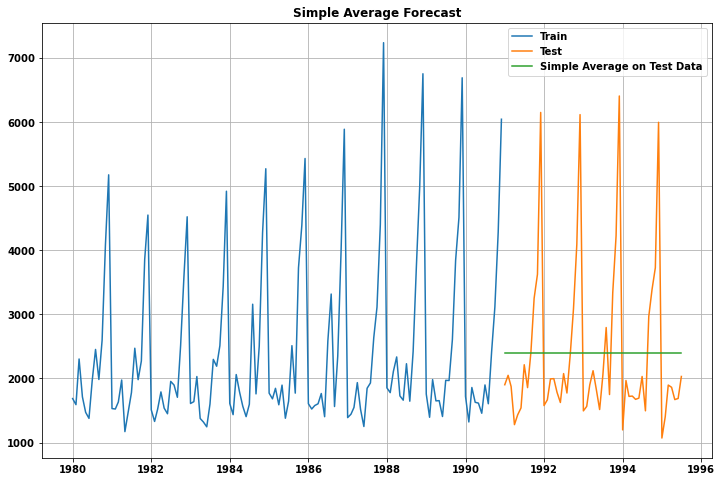

In [35]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [36]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [37]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [38]:
MovingAverage = sparkling.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [39]:
#### Trailing moving averages


MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


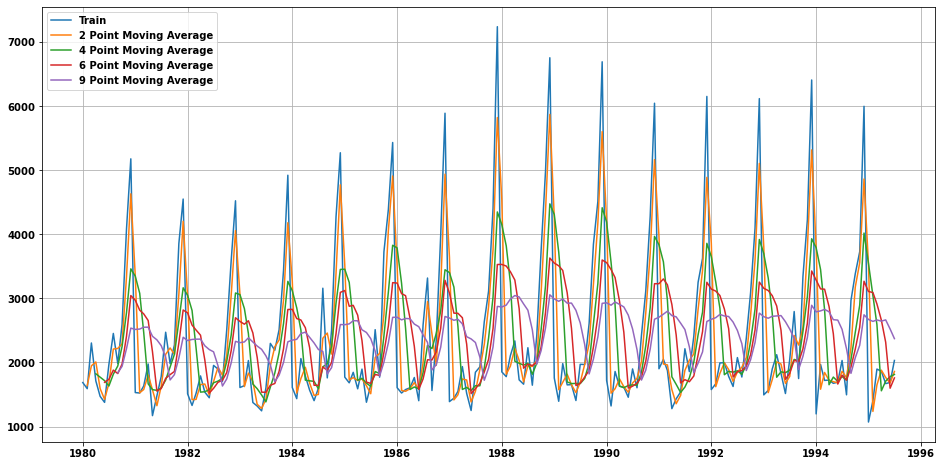

In [40]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [41]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage.loc[:'1990-12-1'] 
trailing_MovingAverage_test=MovingAverage.loc['1-1-1991':]

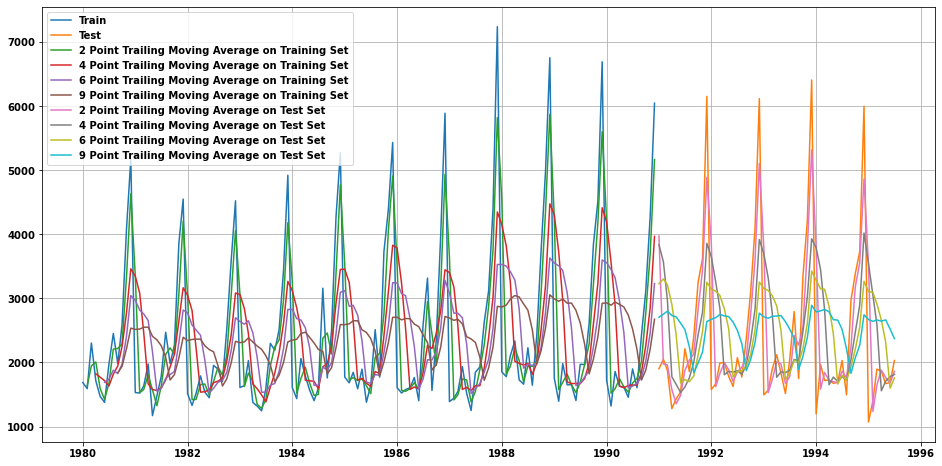

In [42]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [43]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [44]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

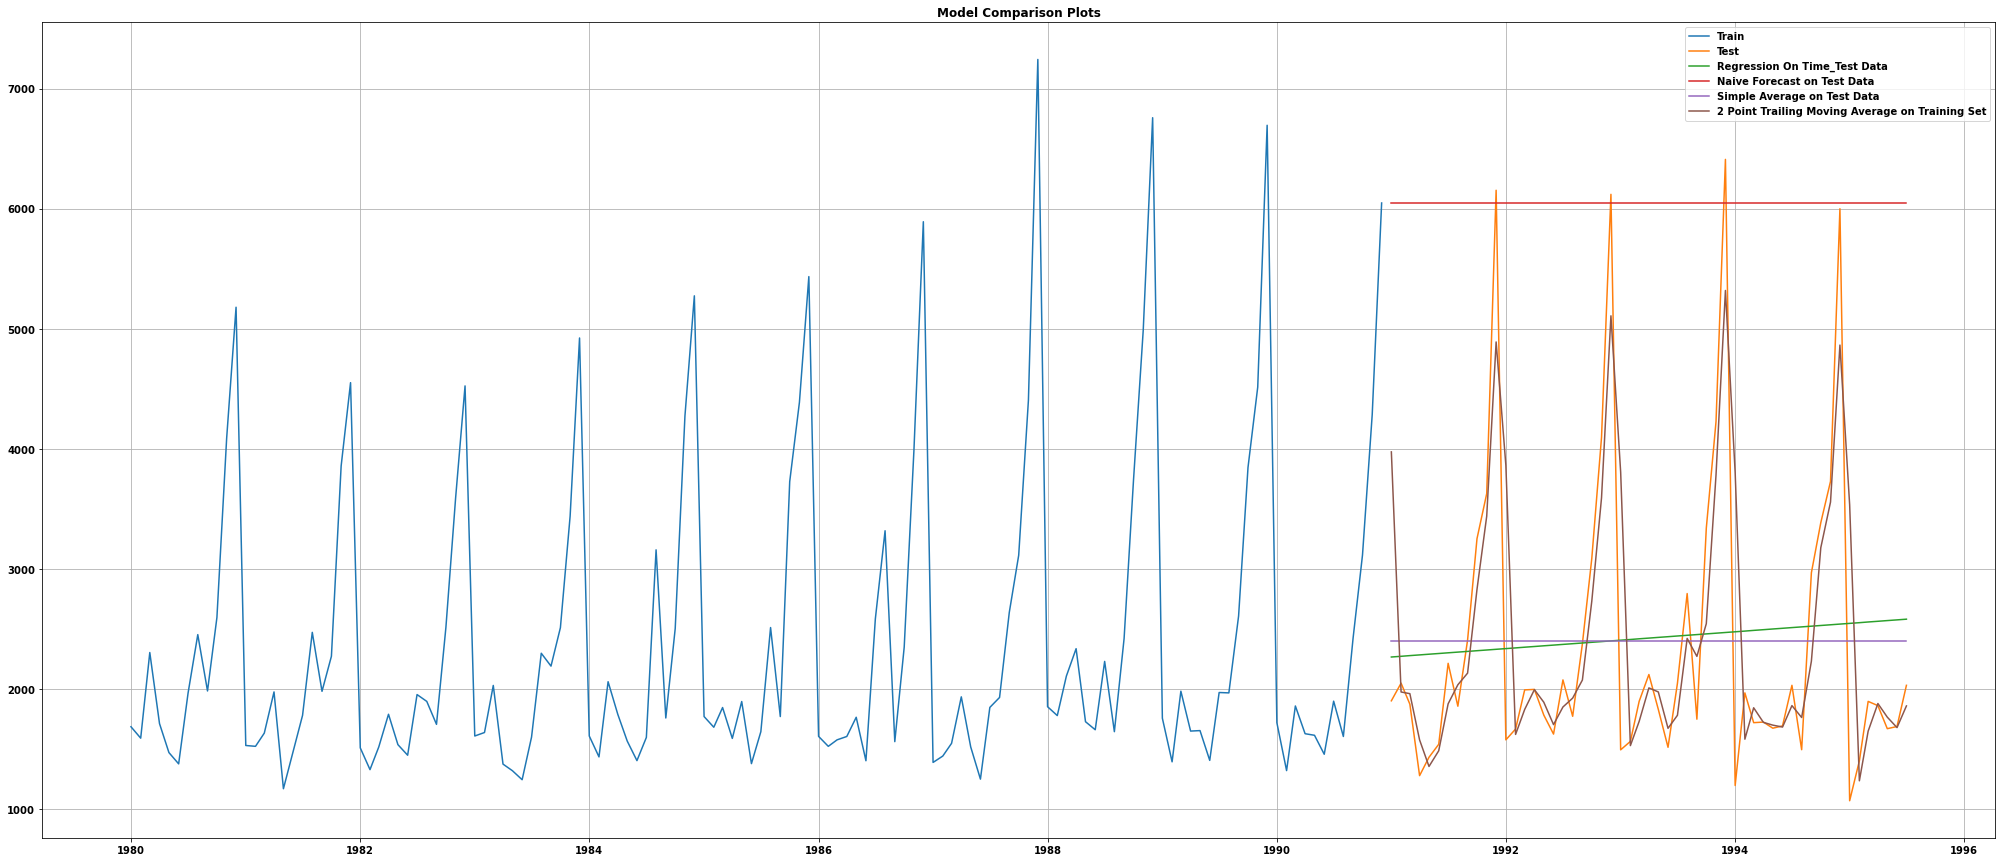

In [45]:
## Plotting on both Training and Test data

plt.figure(figsize=(35,15))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 5: Simple Exponential Smoothing

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [47]:
SES_train = train.copy()
SES_test = test.copy()

In [48]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [49]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [50]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2725.336037
1991-02-01,2049,2725.336037
1991-03-01,1874,2725.336037
1991-04-01,1279,2725.336037
1991-05-01,1432,2725.336037


In [52]:
SES_test.tail()

,Sparkling,predict
YearMonth,,
1995-03-01,1897,2725.336037
1995-04-01,1862,2725.336037
1995-05-01,1670,2725.336037
1995-06-01,1688,2725.336037
1995-07-01,2031,2725.336037


In [53]:
SES_test = SES_test.dropna()

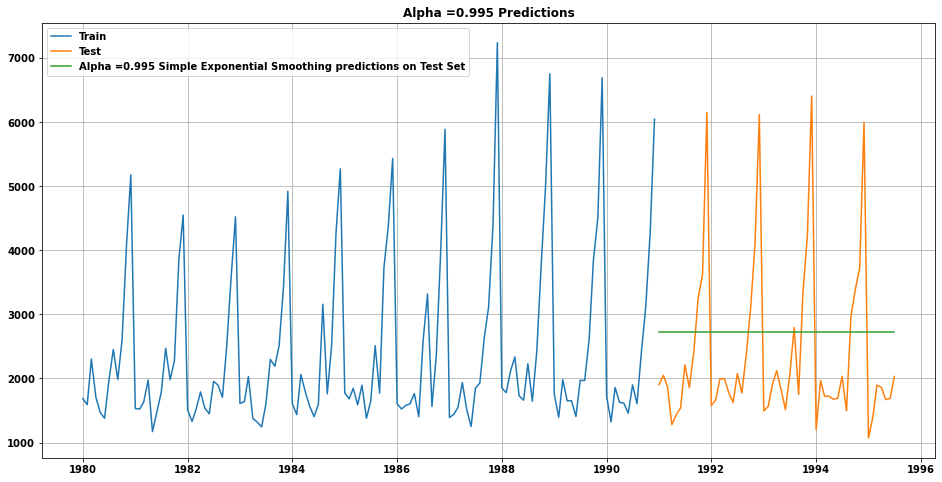

In [54]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [55]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.135


In [56]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [57]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [60]:
SES_test = SES_test.dropna()

In [61]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

## Model Evaluation

In [62]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,1359.511747,1965.259926
1,0.4,1352.588879,2369.842921
2,0.5,1344.004369,2741.588733
3,0.6,1338.805381,3065.575757
4,0.7,1338.844308,3343.905960
5,0.8,1344.462091,3583.214978
6,0.9,1355.723518,3790.295961


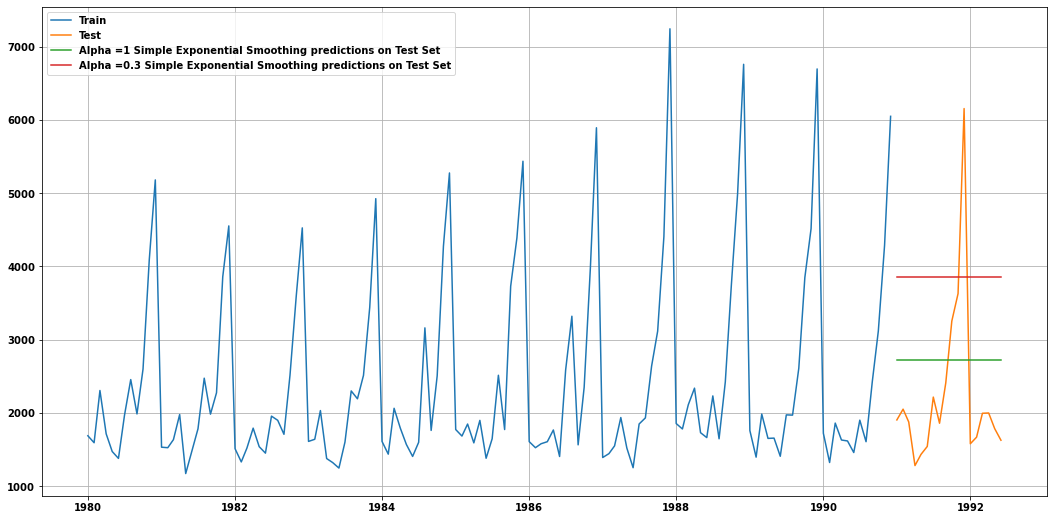

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [64]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411
"Alpha=0.3,SimpleExponentialSmoothing",1965.259926


## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.


In [65]:
DES_train = train.copy()
DES_test = test.copy()

In [66]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [71]:
DES_test = DES_test.dropna()

In [72]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [73]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,7187.864950
1,0.3,0.4,1682.573828,9848.970033
2,0.3,0.5,1771.710791,12749.760539
3,0.3,0.6,1848.576510,15518.798844
4,0.3,0.7,1899.949006,17622.683715
...,...,...,...,...
59,1.0,0.6,1753.402326,18916.472331
60,1.0,0.7,1825.187155,20029.452042
61,1.0,0.8,1902.013709,20961.668583
62,1.0,0.9,1985.368445,21758.517029


Let us sort the data frame in the ascending ordering of the 'Train RMSE' and the 'Test RMSE' values.


In [74]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,7187.864950
8,0.4,0.3,1569.338606,9479.970550
1,0.3,0.4,1682.573828,9848.970033
16,0.5,0.3,1530.575845,10851.982237
24,0.6,0.3,1506.449870,11714.746438


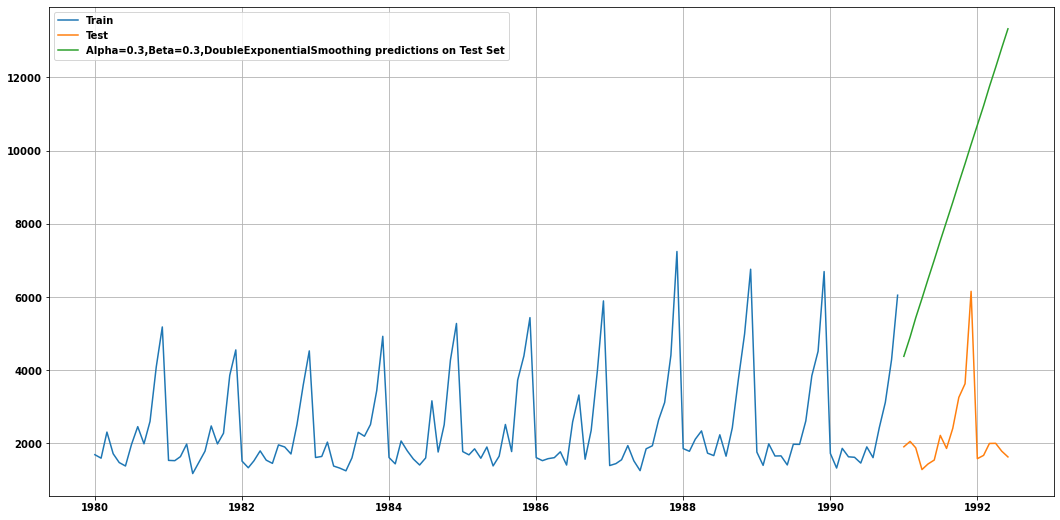

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [76]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411
"Alpha=0.3,SimpleExponentialSmoothing",1965.259926
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",7187.864950


## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [77]:
TES_train = train.copy()
TES_test = test.copy()

In [78]:
TES_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [79]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='Additive',seasonal='Additive')

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [80]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.


In [81]:
model_TES_autofit.params

{'smoothing_level': 0.11251389548104734,
 'smoothing_trend': 0.03751390581093218,
 'smoothing_seasonal': 0.4936878919499166,
 'damping_trend': nan,
 'initial_level': 1640.190493739531,
 'initial_trend': -2.8836121381815296,
 'initial_seasons': array([  45.90398423,  -48.98895367,  662.93595029,   72.68947432,
        -168.88454308, -262.45203324,  326.06672894,  813.23413662,
         344.33205292,  956.08532408, 2446.81380701, 3538.46037363]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1474.614622
1991-02-01,2049,1169.444310
1991-03-01,1874,1658.498588
1991-04-01,1279,1504.366501
1991-05-01,1432,1417.164003


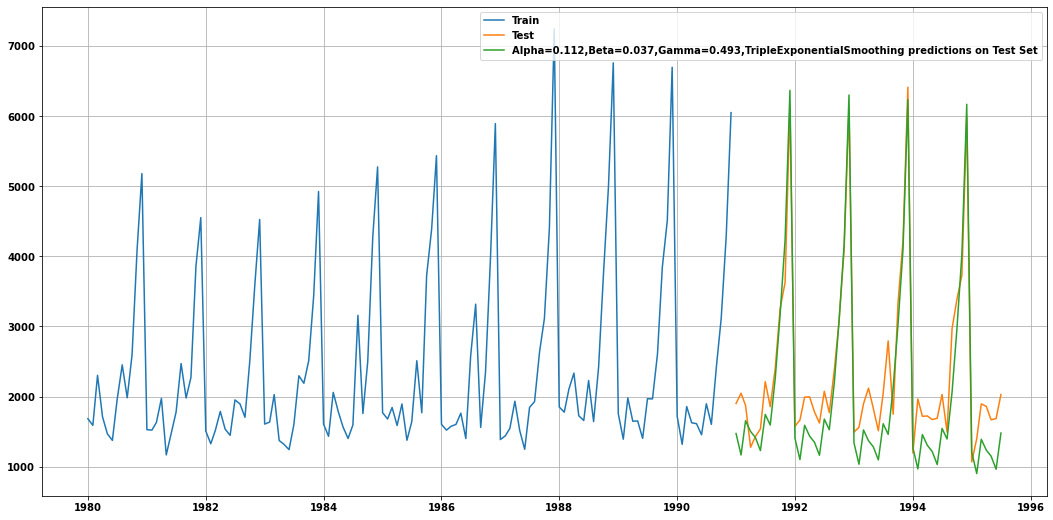

In [83]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [84]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.112,Beta=0.037,Gamma=0.493, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.112,Beta=0.037,Gamma=0.493, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 473.954


In [85]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411
"Alpha=0.3,SimpleExponentialSmoothing",1965.259926
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",7187.864950


In [86]:
## First we will define an empty dataframe to store our values from the loop


resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [89]:
TES_test = TES_test.dropna()

In [90]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [91]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
456,1.0,0.4,0.3,626.947381,680.474452
408,0.9,0.6,0.3,652.594111,680.784078
64,0.4,0.3,0.3,484.083181,682.479525
360,0.8,0.8,0.3,670.912613,715.634150
129,0.5,0.3,0.4,507.378721,737.035793


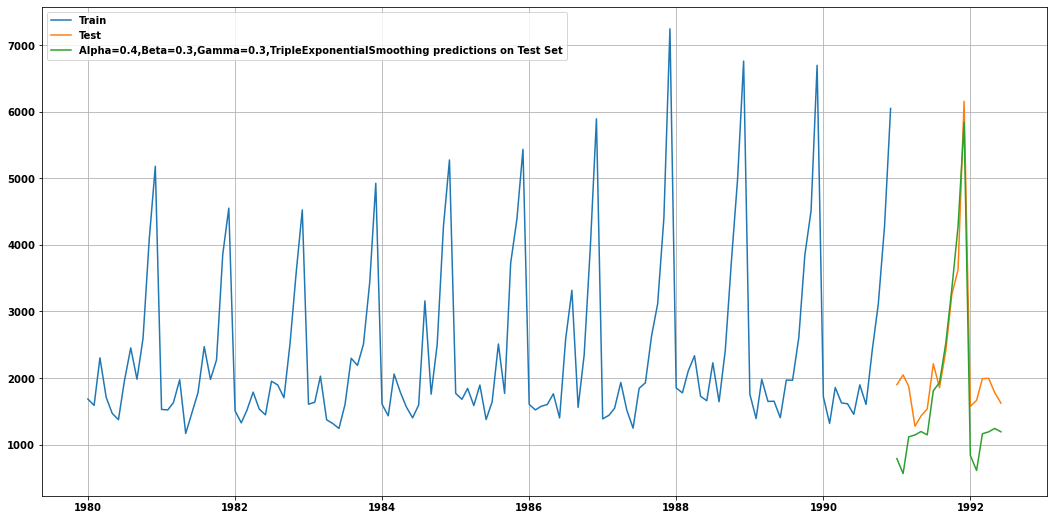

In [92]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination.

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')


plt.plot(TES_test['predict', 0.4, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411
"Alpha=0.3,SimpleExponentialSmoothing",1965.259926
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",7187.864950


In [94]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing",473.954432
"Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",680.474452
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
RegressionOnTime,1275.867052
6pointTrailingMovingAverage,1283.927428
"Alpha=0.995,SimpleExponentialSmoothing",1316.135411
9pointTrailingMovingAverage,1346.278315
"Alpha=0.3,SimpleExponentialSmoothing",1965.259926


### Inferences:

* The top three models according to their RMSE values are as follows:

1) Tripple Exponential Smoothing (Alpha=0.112,Beta=0.037,Gamma=0.493) 

2) Tripple Exponential Smoothing (Alpha=0.4, Beta=0.3, Gamma=0.3)

3) 2point Trailing Moving Average.

### Ques 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [95]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [96]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

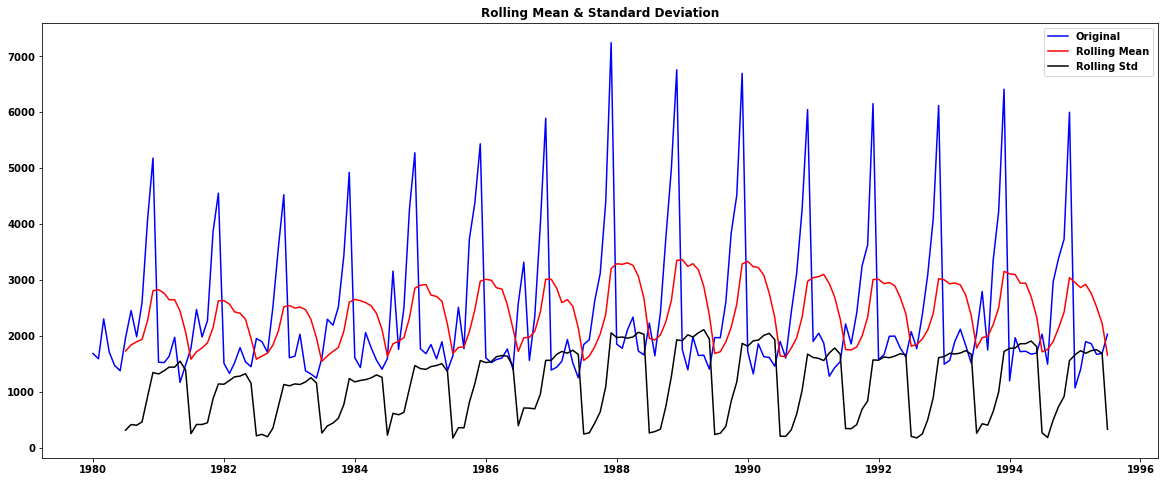

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
test_stationarity(sparkling['Sparkling'])

### Inferences:

We see that at 5% significant level the Time Series is non-stationary.


Let us take a difference of order 1 and check whether the Time Series is stationary or not.

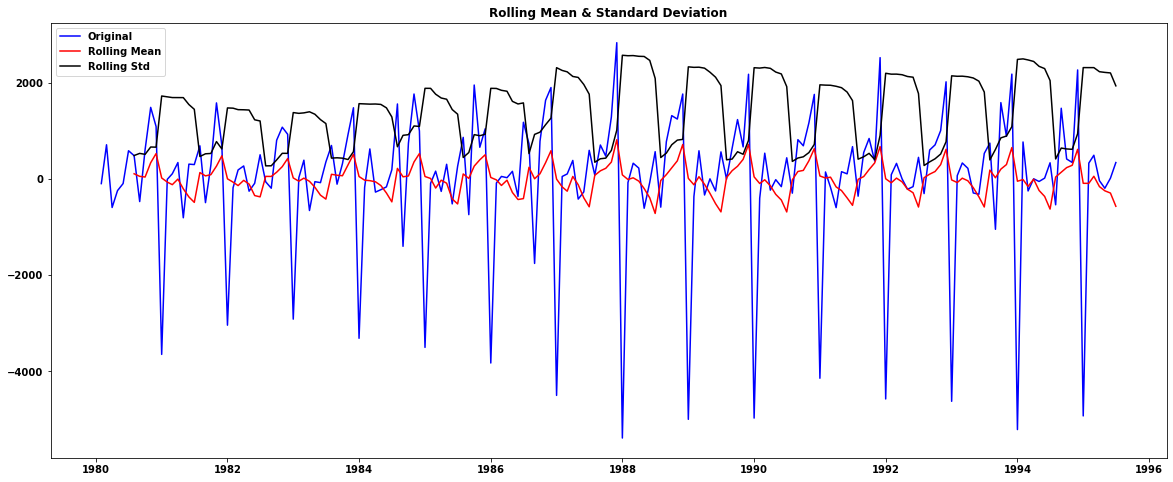

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [98]:
test_stationarity(sparkling['Sparkling'].diff().dropna())

### Inferences:


* After applying one order of differencing, We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

### Ques 6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion.

In [99]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [100]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [101]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.7830976841233
ARIMA(1, 1, 0) - AIC:2268.5280606259744


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:2235.013945352136


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:2233.5976471190857
ARIMA(2, 1, 0) - AIC:2262.035600157607


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2232.3604898864096
ARIMA(2, 1, 2) - AIC:2210.6217053819946


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

In [102]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.621705
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906439
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [103]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.330
Date:                Sun, 13 Feb 2022   AIC                           2210.622
Time:                        15:41:15   BIC                           2227.873
Sample:                    02-01-1980   HQIC                          2217.632
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.518     10.791      0.000       4.571       6.600
ar.L1.D.Sparkling     1.2700      0.075     17.044      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

## Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [105]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.2776411107636


In [106]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto ARIMA(2,1,2)'])

resultsDf1

,Test RMSE
"Auto ARIMA(2,1,2)",1374.277641


## Building an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

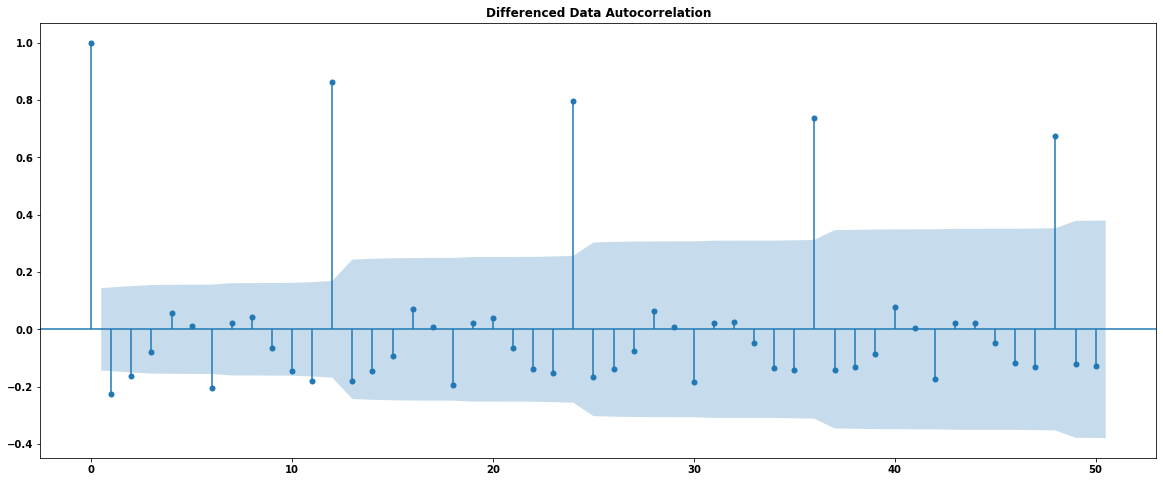

In [108]:
plot_acf(sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality as 6.

In [109]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [110]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [111]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716307
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536891242
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973547
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430244
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111070912
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094795974
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510595
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805655015
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549982
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816758
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858032052
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138757308039
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) 

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298136847
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274258568
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.6243230215157
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510399164
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933328836
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473566726722
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1659.2934108564332
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:1708.1153979382873
SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:1709.0017077852583
SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:1687.144065227611
SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:1661.2118519190226
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.44101016871
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215993
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151451816795
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:1794.4778967481031
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.739568923505
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111270565847
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963212809553
SARIMA(0, 1, 2)x(1, 0, 3, 6) - AI

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.588946830105
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1797.1695149889292
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.242397798814
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.8301602831145
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715258489533
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1705.457969914749
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:1725.460319936332
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:1725.6193715468198
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1705.5121037687027
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1707.415595296874
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.9340491545618
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520745476
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381405087
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1814.6532925055064
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.667120973517
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.6125663126697
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.072780587994
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1736.7486053478262
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:

In [112]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.051899
191,"(2, 1, 3)","(3, 0, 3, 6)",1630.875029
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327867
251,"(3, 1, 3)","(2, 0, 3, 6)",1634.617344
63,"(0, 1, 3)","(3, 0, 3, 6)",1635.054469


In [113]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 13 Feb 2022   AIC                           1727.671
Time:                                   15:54:54   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6451      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.3354      0.227     -1.475

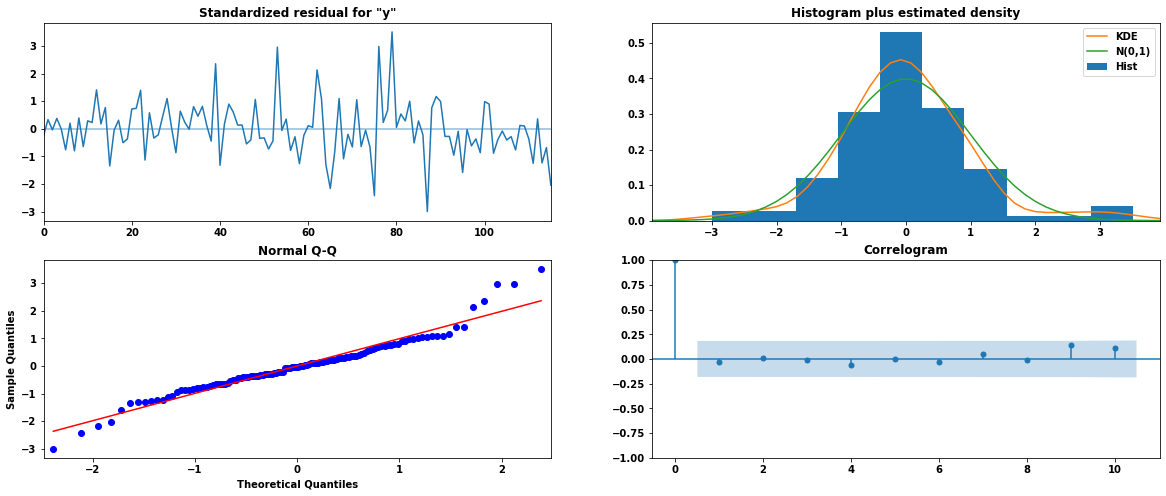

In [114]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [116]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.436796,380.571480,584.530402,2076.343189
1,1177.501138,392.121330,408.957454,1946.044822
2,1625.927669,392.315032,857.004337,2394.851002
3,1546.437160,397.716717,766.926719,2325.947601
4,1308.783204,398.934602,526.885751,2090.680657


In [117]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.7298262686402


In [118]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto SARIMA(1,1,2)(2,0,2,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"Auto ARIMA(2,1,2)",1374.277641
"Auto SARIMA(1,1,2)(2,0,2,6)",626.729826


### Inferences:

* We can clearly see that we have huge gain in the RMSE value by including the seasonal parameters as well.

* Auto SARIMA with paramteres p=1, d=1, q=2, performed way better than Auto ARIMA model because data set has seasonality present in it. 

### Ques-7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Building ARIMA Model based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

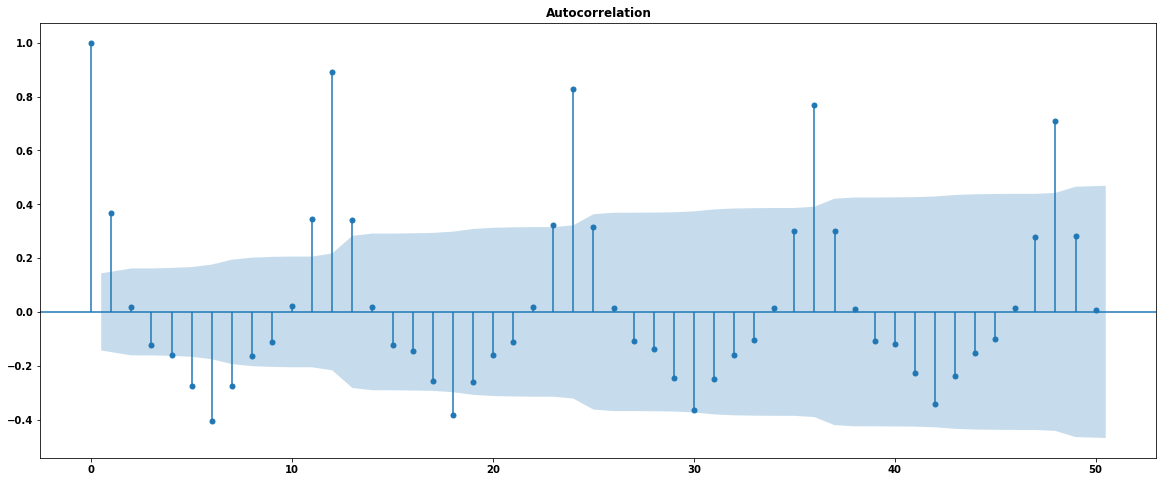

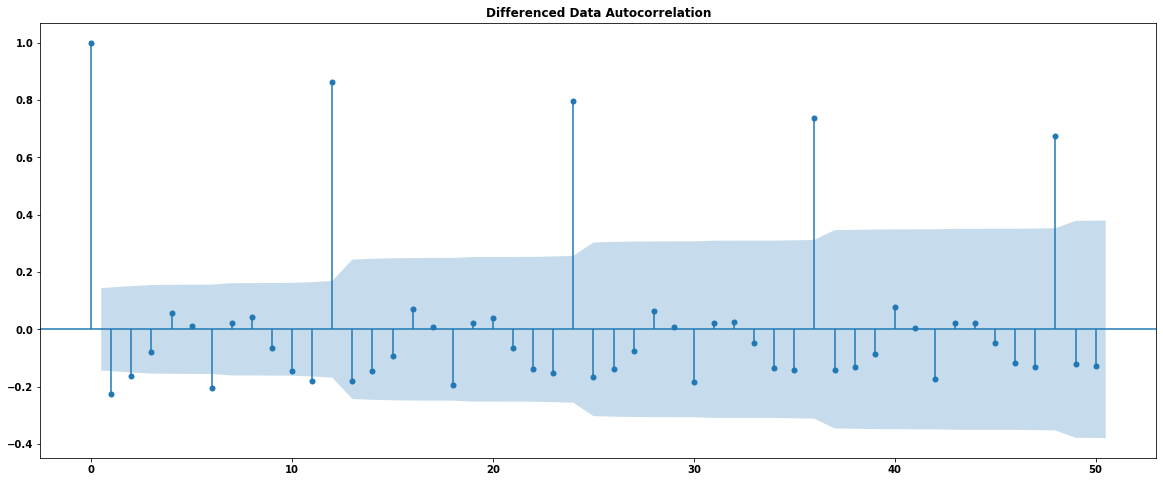

In [120]:
# Plotting ACF Plot.

plot_acf(sparkling['Sparkling'],lags=50)
plot_acf(sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


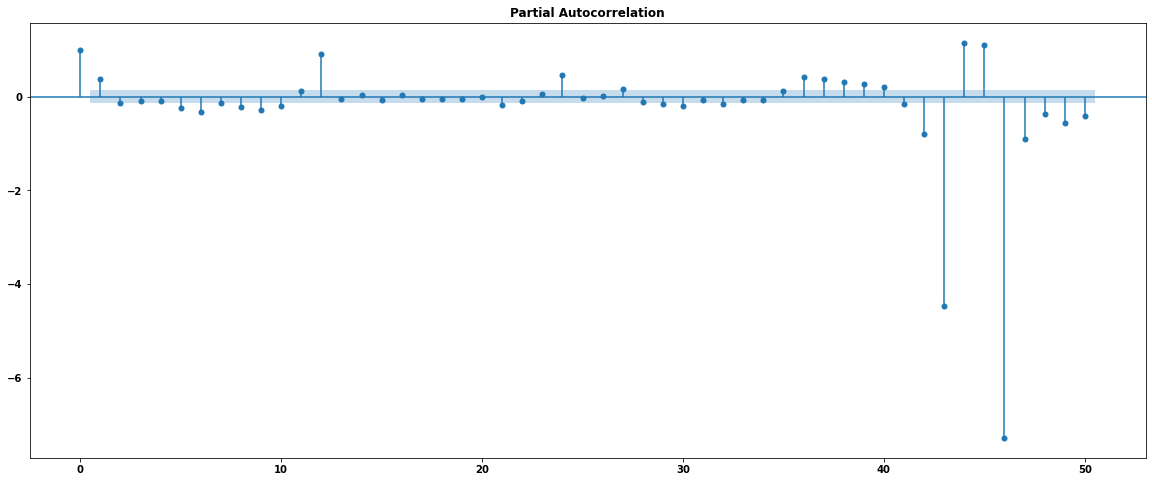

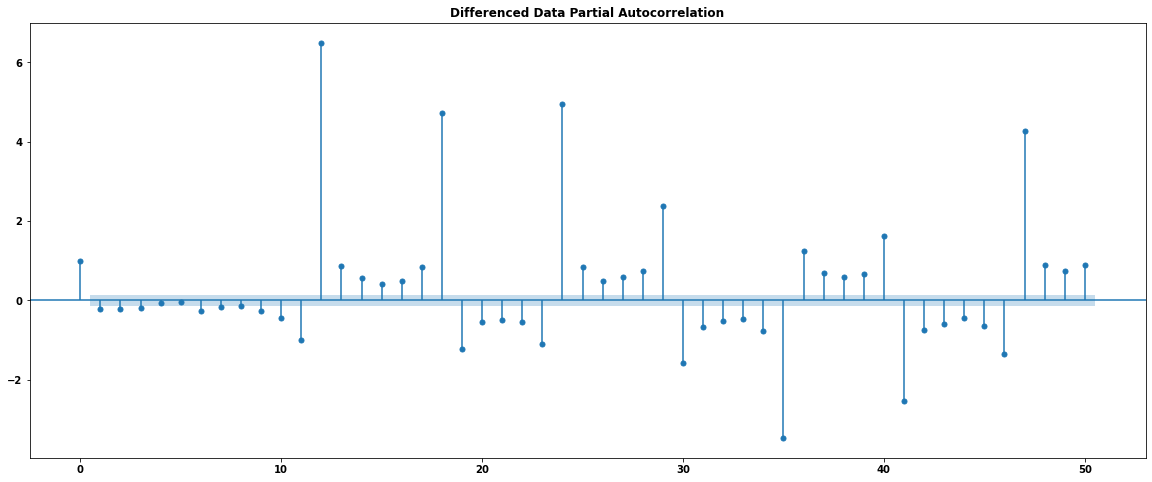

In [121]:
# Plotting PACF Plot.

plot_pacf(sparkling['Sparkling'],lags=50)
plot_pacf(sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

Here, we have taken alpha=0.05.

* After trying various cut off values for p, d and q. I have chosen the following values. 

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 3 and 3 respectively and we have taken d=0.

In [122]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,0,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                     ARMA(3, 3)   Log Likelihood               -1093.078
Method:                       css-mle   S.D. of innovations            917.729
Date:                Sun, 13 Feb 2022   AIC                           2202.155
Time:                        16:29:16   BIC                           2225.218
Sample:                    01-01-1980   HQIC                          2211.527
                         - 12-01-1990                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2387.0069     52.916     45.109      0.000    2283.293    2490.721
ar.L1.Sparkling     0.7215        nan        nan        nan         nan         nan
ar.L2.Sparkling     0.7358      

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


## Predict on the Test Set using this model and evaluate the model.

In [123]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [124]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

979.0454717575079


In [125]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(3,0,3)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"Auto ARIMA(2,1,2)",1374.277641
"Auto SARIMA(1,1,2)(2,0,2,6)",626.729826
"Manual ARIMA(3,0,3)",979.045472


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 3. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 2.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

In [126]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 2, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 2, [1, 2, 3], 6)   Log Likelihood                -732.874
Date:                                   Sun, 13 Feb 2022   AIC                           1489.747
Time:                                           16:32:23   BIC                           1520.767
Sample:                                                0   HQIC                          1502.294
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6125      0.300     -2.044      0.041    

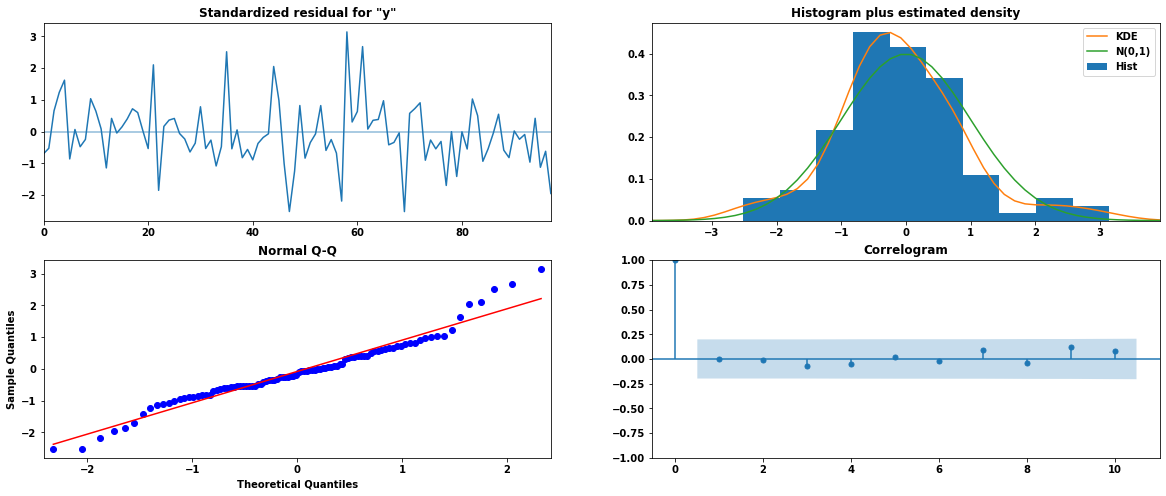

In [127]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [129]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1244.388634,403.745647,453.061707,2035.715561
1,841.337704,416.047428,25.899729,1656.775678
2,1614.591346,415.977136,799.291140,2429.891552
3,1588.483954,427.675446,750.255483,2426.712424
4,1174.680546,428.580960,334.677301,2014.683792


In [130]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1008.4806671313852


In [131]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(3,1,2)(3,2,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"Auto ARIMA(2,1,2)",1374.277641
"Auto SARIMA(1,1,2)(2,0,2,6)",626.729826
"Manual ARIMA(3,0,3)",979.045472
"Manual SARIMA(3,1,2)(3,2,3,6)",1008.480667


### Inferences:

* It is evident from the above RMSE scores of the models that even after choosing the parameters manually by looking at the ACF and PACF plots, the Auto SARIMA model with parameters (1,1,2)(2,0,2,6) has given the best RMSE scores among all. 

### Ques-8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [132]:
Models_RMSE = pd.concat([resultsDf,resultsDf1])

In [133]:
Models_RMSE.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.112,Beta=0.037,Gamma=0.493,TripleExponentialSmoothing",473.954432
"Auto SARIMA(1,1,2)(2,0,2,6)",626.729826
"Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",680.474452
2pointTrailingMovingAverage,813.400684
"Manual ARIMA(3,0,3)",979.045472
"Manual SARIMA(3,1,2)(3,2,3,6)",1008.480667
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
RegressionOnTime,1275.867052
6pointTrailingMovingAverage,1283.927428


### Inferences: 

* From the above table, we can clearly infer that the top three models according to their RMSE scores are as follows:

1) Tripple Exponential Smoothing (Alpha=0.112, Beta=0.037, Gamma=0.493)

2) Auto SARIMA (1,1,2)(2,0,2,6)

3) Tripple Exponential Smoothing (Alpha=0.4, Beta=0.3, Gamma=0.3)

### Ques9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


### Building the most optimum model 'TrippleExponentialSmoothing(Alpha=0.112, Beta=0.037, Gamma=0.493)

In [134]:
fullmodel1 = ExponentialSmoothing(sparkling,
                                  trend='additive',
                                  seasonal='additive').fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [135]:
RMSE_fullmodel1 = metrics.mean_squared_error(sparkling['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE for Complete Model for Exponential Smoothing :',round(RMSE_fullmodel1))

RMSE for Complete Model for Exponential Smoothing : 366


<B> 95 Percent Confidence Interval Table

In [136]:
prediction_1 = fullmodel1.forecast(steps=12)

In [137]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head().round(2)

,lower_CI,prediction,upper_ci
1995-08-01,1138.35,1858.04,2577.73
1995-09-01,1713.01,2432.70,3152.39
1995-10-01,2526.45,3246.13,3965.82
1995-11-01,3168.78,3888.47,4608.16
1995-12-01,5380.18,6099.87,6819.56


<B>12 month Forecast along with confidence interval

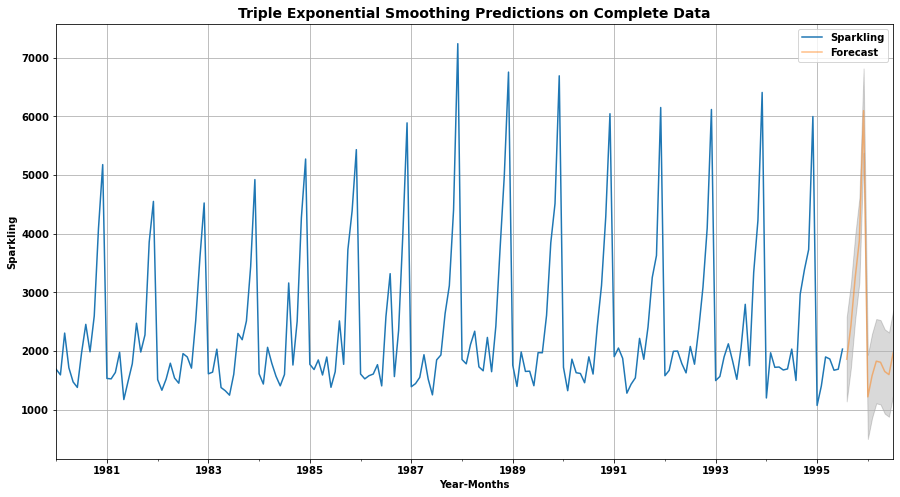

In [138]:
# plot the forecast along with the confidence band

axis = sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.title('Triple Exponential Smoothing Predictions on Complete Data', fontsize=14);
plt.legend(loc='best')
plt.grid()
plt.show()

### Ques 10: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


* Refer Report